### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data collection & Analysis

In [2]:
# loading the data from csv file to a pandas Dataframe
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# first 5 rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
df.shape

(1338, 7)

In [5]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Categorical Features:
- Sex
- Smoker<br>
- Region<br>

In [6]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [7]:
# statistical measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


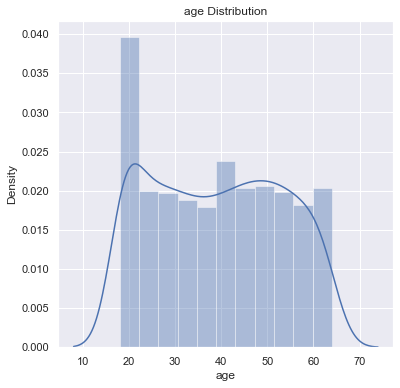

In [8]:
# distribution of age values
sns.set()
plot.figure(figsize=(6,6))
sns.distplot(df['age'])
plot.title('age Distribution')
plot.show()

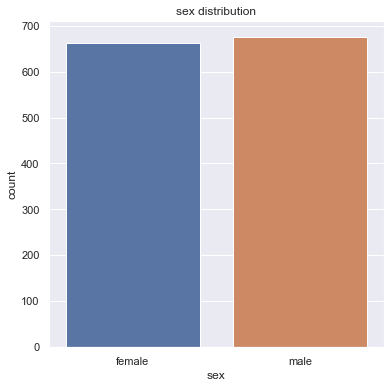

In [9]:
# Gender column
plot.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plot.title('sex distribution')
plot.show()

In [10]:
df['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

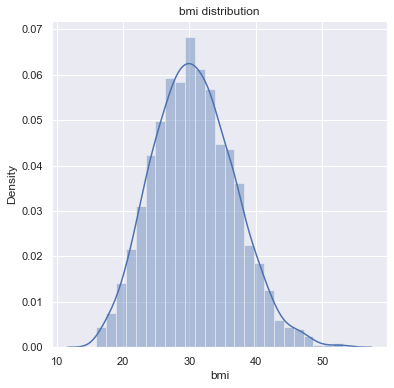

In [11]:
# bmi distribution
plot.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plot.title('bmi distribution')
plot.show()

Normal BMI range-->18.5to 24.9

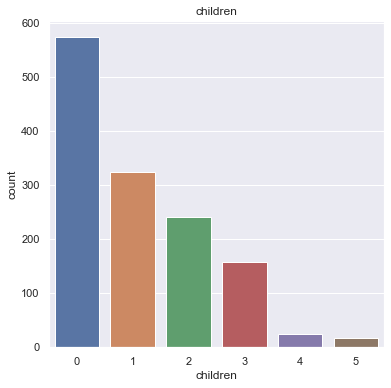

In [12]:
# children column
plot.figure(figsize=(6,6))
sns.countplot(x="children",data=df)
plot.title("children")
plot.show()

In [13]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

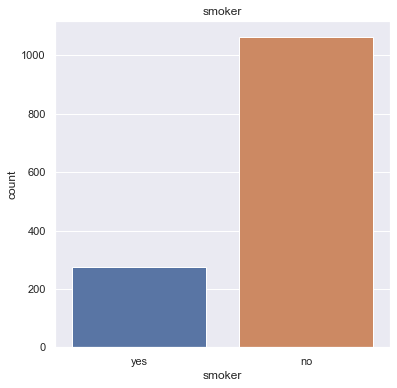

In [14]:
# smoker column
plot.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plot.title('smoker')
plot.show()

In [15]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

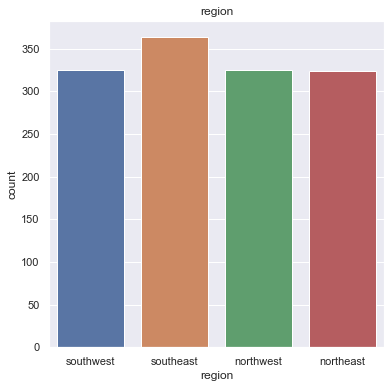

In [16]:
# region column
plot.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plot.title('region')
plot.show()

In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

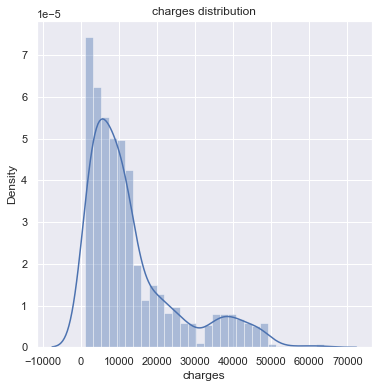

In [18]:
# distribution of charges Values
plot.figure(figsize=(6,6))
sns.distplot(df['charges'])
plot.title('charges distribution')
plot.show()

### Data pre-processing 

#### Encoding the categorical features

In [19]:
# encoding sex column 
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker'column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

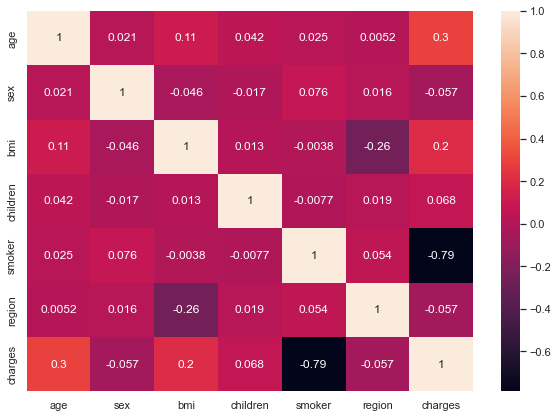

In [20]:
plot.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plot.show()

### Splitting the Features and Target

In [21]:
x=df.drop(['charges','sex'],axis=1)
y=df['charges']

In [22]:
print(x)

      age     bmi  children  smoker  region
0      19  27.900         0       0       1
1      18  33.770         1       1       0
2      28  33.000         3       1       0
3      33  22.705         0       1       3
4      32  28.880         0       1       3
...   ...     ...       ...     ...     ...
1333   50  30.970         3       1       3
1334   18  31.920         0       1       2
1335   18  36.850         0       1       0
1336   21  25.800         0       1       1
1337   61  29.070         0       0       3

[1338 rows x 5 columns]


In [23]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### Splitting the data into Training data & Testing data

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 5) (1070, 5) (268, 5)


### Model Training 

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [30]:
# loading the Linear Regression model
regressor=LinearRegression()


In [31]:
regressor.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

In [40]:
pred=regressor.predict(x_test)

In [42]:
print("R2 score: ",(r2_score(y_test,pred)))

R2 score:  0.7446775413506159


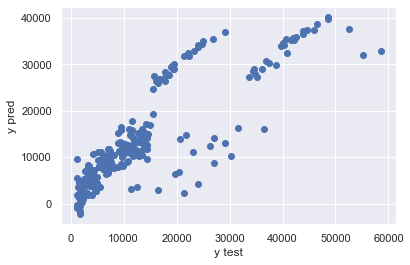

In [43]:
plot.scatter(y_test,pred)
plot.xlabel('y test')
plot.ylabel('y pred')
plot.show()

In [55]:
data={'age':19, 'bmi':27.900, 'children':0, 'smoker':0, 'region':1}
index=[0]
cust_df=pd.DataFrame(data,index)
cust_df

,age,bmi,children,smoker,region
0,19,27.9,0,0,1


In [56]:
cost_pred=regressor.predict(cust_df)
print('the medical insurance cost of the new customer is: ',cost_pred)

the medical insurance cost of the new customer is:  [25583.13604273]


THANK YOU!